In [1]:
import pandas as pd

In [2]:
!pip install chembl_webresource_client

In [3]:
from chembl_webresource_client.new_client import new_client

In [4]:
# data = new_client.target
# data_query = data.search('acetylcholinesterase')

# targets = pd.DataFrame.from_dict(data_query)
# targets.columns

In [5]:
data_new = new_client.activity
data1 = data_new.filter(target_chembl_id='CHEMBL233').filter(standard_type="IC50")

df = pd.DataFrame.from_dict(data1)
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

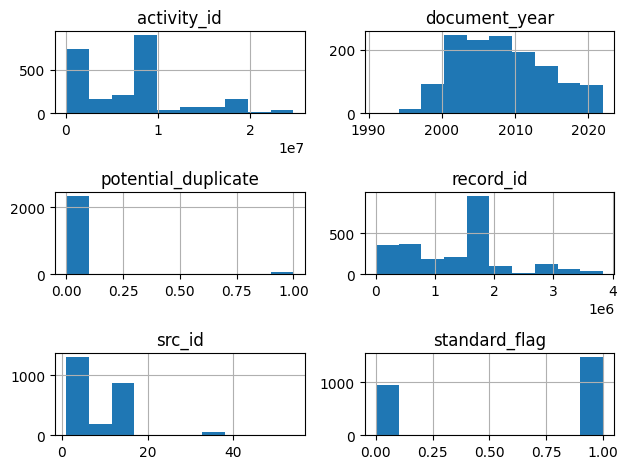

In [6]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()
plt.show()

C:\Users\tiant\AppData\Local\Temp\ipykernel_368\4097183948.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)


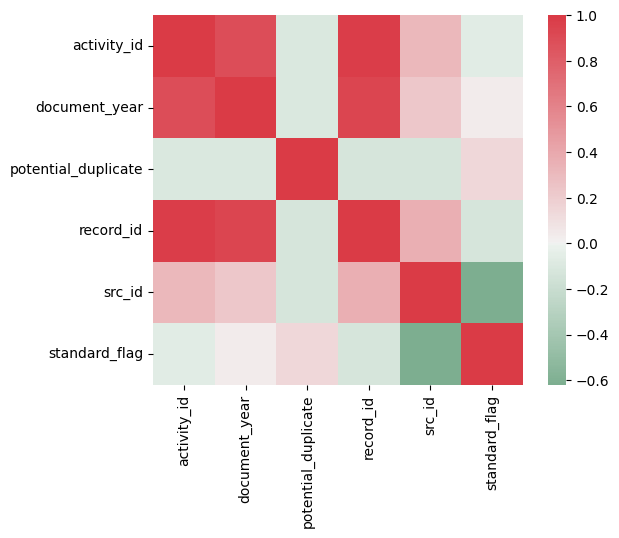

In [7]:
import seaborn as sns
cmap=sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)
plt.show()

In [8]:
# def create_categorical(values):
#     if isinstance(values[0], list):
#         # Convert list to string and then create categorical variable
#         return pd.Categorical([str(x) for x in values])
#     else:
#         # Create categorical variable as usual
#         return pd.Categorical(values)
#
# for col in df.columns:
#     if df[col].dtype == 'object' and not isinstance(df[col].iloc[0], dict):
#         df[col] = create_categorical(df[col])
#         df[col] = df[col].cat.codes
#
# cmap=sns.diverging_palette(500,10,as_cmap=True)
# sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)
# plt.show()

In [9]:
print(df['standard_value'].unique())

['5250.0' '3480.0' '320.0' '4130.0' '10000.0' '8150.0' '3800.0' '1020.0'
 '3330.0' '2590.0' '3570.0' '5440.0' '2740.0' '3390.0' '6760.0' '817.0'
 '5980.0' '597.0' '1030.0' '2980.0' '1510.0' '3290.0' '5050.0' '8.2' None
 '4.0' '1.82' '2.0' '960.0' '1.5' '19.3' '147.0' '1050.0' '2.4' '235.0'
 '1.0' '1.3' '1470.0' '2890.0' '0.9' '2285.0' '24.9' '1.7' '735.0' '1.2'
 '4955.0' '315.0' '4.1' '2480.0' '16.0' '1235.0' '16.7' '520.0' '1730.0'
 '83.5' '6.3' '179.0' '4280.0' '780.0' '1200.0' '2680.0' '2200.0' '1680.0'
 '248.0' '1700.0' '1100.0' '950.0' '2064.0' '308.0' '2716.0' '1240.0'
 '4840.0' '3910.0' '3300.0' '1464.0' '43.0' '3460.0' '5000.0' '15000.0'
 '1800.0' '6900.0' '9500.0' '17000.0' '27000.0' '6000.0' '105.0' '500.0'
 '0.13' '8.0' '103.0' '764.0' '230.0' '120.0' '690.0' '1010.0' '1080.0'
 '200.0' '404.0' '220.0' '160.0' '1150.0' '611.0' '2000.0' '390.0' '53.0'
 '360.0' '7.0' '56.0' '44.0' '82.0' '0.57' '6.4' '59.0' '695.0' '650.0'
 '420.0' '130.0' '2050.0' '4.7' '8.3' '100.0' '610.0' '

In [10]:
#dropping records which donot have values in columns standard_value and canonical_smiles
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]

#dropping records with duplicate canonical_smiles values to keep them unique
df2_unique = df2.drop_duplicates(['canonical_smiles'])
selection = ['molecule_chembl_id','canonical_smiles','standard_value']


In [11]:
print(df['standard_value'].unique())

['5250.0' '3480.0' '320.0' '4130.0' '10000.0' '8150.0' '3800.0' '1020.0'
 '3330.0' '2590.0' '3570.0' '5440.0' '2740.0' '3390.0' '6760.0' '817.0'
 '5980.0' '597.0' '1030.0' '2980.0' '1510.0' '3290.0' '5050.0' '8.2' None
 '4.0' '1.82' '2.0' '960.0' '1.5' '19.3' '147.0' '1050.0' '2.4' '235.0'
 '1.0' '1.3' '1470.0' '2890.0' '0.9' '2285.0' '24.9' '1.7' '735.0' '1.2'
 '4955.0' '315.0' '4.1' '2480.0' '16.0' '1235.0' '16.7' '520.0' '1730.0'
 '83.5' '6.3' '179.0' '4280.0' '780.0' '1200.0' '2680.0' '2200.0' '1680.0'
 '248.0' '1700.0' '1100.0' '950.0' '2064.0' '308.0' '2716.0' '1240.0'
 '4840.0' '3910.0' '3300.0' '1464.0' '43.0' '3460.0' '5000.0' '15000.0'
 '1800.0' '6900.0' '9500.0' '17000.0' '27000.0' '6000.0' '105.0' '500.0'
 '0.13' '8.0' '103.0' '764.0' '230.0' '120.0' '690.0' '1010.0' '1080.0'
 '200.0' '404.0' '220.0' '160.0' '1150.0' '611.0' '2000.0' '390.0' '53.0'
 '360.0' '7.0' '56.0' '44.0' '82.0' '0.57' '6.4' '59.0' '695.0' '650.0'
 '420.0' '130.0' '2050.0' '4.7' '8.3' '100.0' '610.0' '

['intermediate' 'active' 'inactive']


<Axes: xlabel='bioactivity_threshold', ylabel='count'>

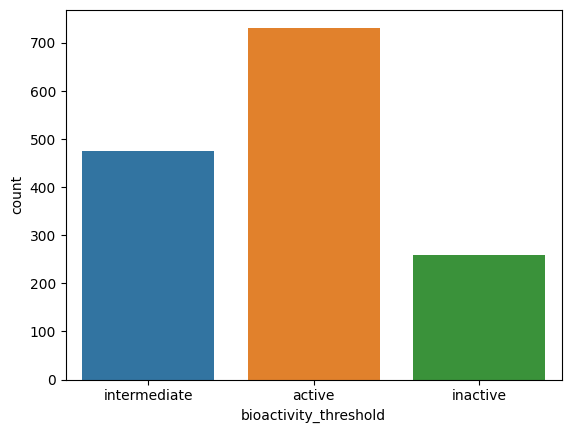

In [12]:
df2['bioactivity_threshold'] = df2['standard_value'].apply(lambda x: 'active' if float(x) < 1000 else ('inactive' if float(x)  > 10000 else 'intermediate'))
print(df2['bioactivity_threshold'].unique())
sns.countplot(x='bioactivity_threshold', data=df2)

In [13]:
!pip install RDKit
import numpy as np 
df3 = df2_unique[selection]
df3['plC50']= df3['standard_value'].apply(lambda x: np.log10(float(x)))

C:\Users\tiant\AppData\Local\Temp\ipykernel_368\2511810914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['plC50']= df3['standard_value'].apply(lambda x: np.log10(float(x)))


In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))

df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))
# fps = [Chem.RDKFingerprint(x) for x in ms]

# dropping NaN rows in the dataframe
nan_row = df3[df3['plC50'].isna()]
nan_row
df3= df3.drop(index=2126)

C:\Users\tiant\AppData\Local\Temp\ipykernel_368\751247740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))
C:\Users\tiant\AppData\Local\Temp\ipykernel_368\751247740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))


In [15]:
X= df3['canonical_smiles_fingerprints'].to_numpy()
y= df3['plC50'].to_numpy()

In [16]:
final_data= np.vstack((X, y))
final_data= final_data.T
final_data= pd.DataFrame(final_data)

In [17]:
print(len(final_data[0][0]))

2048


In [18]:
arr = final_data[0]
temp = np.zeros((1262,2048),dtype=int)
for i in range(1262):
  for j in range(2048):
    temp[i,j] = int(arr[i][j])

print(temp)




[[0 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 1 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]]


In [19]:
cha = np.array(final_data[1]).reshape(1262,1)
input = np.concatenate((temp,cha), axis =1)


In [20]:
final_data=pd.DataFrame(input)

In [21]:
# import xgboost as xg
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error as MSE

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)

# xgb_r.fit(X_train, Y_train)
# Y_pred = xgb_r.predict(X_test)

In [22]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
# import plotly.graph_objects as go
import random
from sklearn.neighbors import KNeighborsRegressor

In [54]:
# Combined

def ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, querystrat, n_batch): 
  
  scores=[]

  model.fit(X_training, y_training)

  initial_model_error= cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  scores.append(np.abs(initial_model_error).mean())

  unobserved_error=[]

  initial_model_error= cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  val=[abs(np.mean(initial_model_error))]
  
  # randomly sample each of the n query points, remove the point from the remianing test data, predict the model performace, then teach it again
  for i in range(int((n_queries-n_initial)/n_batch)):
      # print(int((n_queries-n_initial)/n_batch))
      # print("Round:", i)
      
      # query by committee method 
      if querystrat=="random":
        model.fit(X_training, y_training)

        # randomly sample the next 3 points to be added
        indices = np.random.choice(range(len(X_test)), size=3, replace=False)
        queries = [(X_test[i], y_test[i]) for i in indices]

        # y_pred = model.predict(X_test)
        # scores.append(mean_squared_error(y_test, y_pred))

        model.fit(X_training, y_training)

        # # add the points to the training data 
        # X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
        # y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

        # # remove the data points we used in training from the remaining test data 
        # X_test = np.delete(X_test, indices, 0)  
        # y_test = np.delete(y_test, indices, 0)

      # diversity based sampling method 
      elif querystrat == "Diversity Based Sampling": 
        model.fit(X_training, y_training)
        cluster_num = 3

        # Fit k-means clustering model to the remaining unobserved test data
        kmeans = KMeans(n_clusters=n_batch).fit(X_test)
        labels = kmeans.labels_
        indices = []
        # print(n_batch/cluster_num)
        for j in range(int(n_batch/cluster_num)):
          for k in range(cluster_num):
            cluster_indices = np.where(kmeans.labels_ == k)[0]
            random_index = np.random.choice(cluster_indices)
            indices.append(random_index)

        # y_pred = model.predict(X_test)
        # scores.append(mean_squared_error(y_test, y_pred))

        # model.fit(X_training, y_training)

        # y_pred = model.predict(X_test)
        # scores.append(mean_squared_error(y_test, y_pred))

        # model.fit(X_training, y_training)

        # # add the points to the training data 
        # X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
        # y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

        # # remove the data points we used in training from the remaining test data 
        # X_test = np.delete(X_test, indices, 0)  
        # y_test = np.delete(y_test, indices, 0)

      elif querystrat == "Batch Uncertainty Sampling":

        model.fit(X_training, y_training)
        
        booster=model.get_booster()
        n = X_test.shape[0]
        uncertain_list = [0]*n
        individual_preds=[]
        for tree_ in booster:
            individual_preds.append(tree_.predict(xg.DMatrix(X_test)))

        individual_preds=np.vstack(individual_preds)
        pred_var=np.var(individual_preds,axis=0)
        sorted_indices = np.argsort(pred_var)
    
        # Slice the sorted indices to get the last n indices
        indices = sorted_indices[-(n_batch):]

      y_pred = model.predict(X_test)
      scores.append(mean_squared_error(y_test, y_pred))

      model.fit(X_training, y_training)

      # add the points to the training data 
      X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
      y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

      # remove the data points we used in training from the remaining test data 
      X_test = np.delete(X_test, indices, 0)  
      y_test = np.delete(y_test, indices, 0)

      val_error= cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
      val.append(abs(np.mean(val_error)))

  y_pred = model.predict(X_test)
  print("last mse score: ", mean_squared_error(y_test, y_pred))
  scores.append(mean_squared_error(y_test, y_pred))
  
  print(scores)
  print("LEN", len(scores))
  print("VAL", val)
  return scores, val

In [24]:
# def ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, querystrat, n_batch): 
#   # random.seed()
#   # df = df.sample(frac = 1)
#   # #split data into X and y 
#   # X = df.iloc[0]
#   # y = df.iloc[1]

#   # X = X.to_numpy()[:, (0,1)]
#   # y = y.to_numpy()

#   # # get the indicies of the first n observations that were randomly chosen
#   # index_initial = np.random.choice(range(len(X)), size=n_initial, replace=False)
#   # # save the remaining data points to be sampled from later 
#   # remaining = [i for i in range(len(X)) if i not in index_initial]

#   # # assign the data points to the training and test arrays 
#   # X_training = X[index_initial]
#   # y_training= y[index_initial]
#   # X_test= X[remaining]
#   # y_test = y[remaining]

#   #model= xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)

#   scores=[]

#   model.fit(X_training, y_training)

#   initial_model_error= cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
#   scores.append(np.abs(initial_model_error))

#   unobserved_error=[]
  
#   # randomly sample each of the n query points, remove the point from the remianing test data, predict the model performace, then teach it again
#   for i in range(int((n_queries-n_initial)/n_batch)):
      
#       # query by committee method 
#       if querystrat=="random":
#         model.fit(X_training, y_training)

#         # randomly sample the next 3 points to be added
#         indices = np.random.choice(range(len(X_test)), size=3, replace=False)
#         queries = [(X_test[i], y_test[i]) for i in indices]

#         y_pred = model.predict(X_test)
#         scores.append(mean_squared_error(y_test, y_pred))

#         model.fit(X_training, y_training)

#         # add the points to the training data 
#         X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
#         y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

#         # remove the data points we used in training from the remaining test data 
#         X_test = np.delete(X_test, indices, 0)  
#         y_test = np.delete(y_test, indices, 0)

#       # diversity based sampling method 
#       elif querystrat== "Diversity Based Sampling": 
#         model.fit(X_training, y_training)

#         # Fit k-means clustering model to the remaining unobserved test data
#         kmeans = KMeans(n_clusters=n_batch).fit(X_test)
#         labels = kmeans.labels_
#         indices = []
#         for i in range(n_batch):
#           cluster_indices = np.where(kmeans.labels_ == i)[0]
#           random_index = np.random.choice(cluster_indices)
#           indices.append(random_index)
          
          

#         # Get the indices of the centroid closest to each cluster 
#         # indices = []
#         # for i in range(n_batch):
#         #   centroid_distances = np.linalg.norm(X_test - kmeans.cluster_centers_[i], axis=1)
#         #   indices.append(np.argmin(centroid_distances))
        
#         # For kneighbor, using kneighbors to get the distance for each data point
      
#         # para =np.array(kmeans.kneighbors(X_test, return_distance=False))
#         # # print(para)
#         # # FB is find the biggest
#         # indices = FB(para, n_batch)
#         # print(indices)
        
#         # Get the indices of the centroid closest to each cluster / random from each cluster
#         # indices = []
#         # for i in range(n_batch):
#         #   cluster_indices = np.where(kmeans.labels_ == i)[0]
#         #   random_index = np.random.choice(cluster_indices)
#         #   indices.append(random_index)

#         queries = [(X_test[i], y_test[i]) for i in indices]

#         y_pred = model.predict(X_test)
#         scores.append(mean_squared_error(y_test, y_pred))

#         model.fit(X_training, y_training)

#         # add the points to the training data 
#         X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
#         y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

#         # remove the data points we used in training from the remaining test data 
#         X_test = np.delete(X_test, indices, 0)  
#         y_test = np.delete(y_test, indices, 0)

#   y_pred = model.predict(X_test)
#   print("last acc score: ", mean_squared_error(y_test, y_pred))
#   scores.append(mean_squared_error(y_test, y_pred))
  
#   print(scores)
#   print("LEN", len(scores))
#   return scores

In [44]:
#Given a 2d array, return the indices of the biggest number in each column
def FB(arr, n_cols):
    df =pd.DataFrame(arr)
    # print(df)
    indices = []
    id = 0
    for i in range(n_cols):
        id = df.iloc[:,i].idxmin()
        n = 1
        while id in indices:
            n+=1
            id = df.iloc[:,i].nsmallest(n).index[-1]
            # print(i,id)
        indices.append(id)
    return indices
        

In [45]:
# test the function of FB
arr = np.array([[1,1,1],[2,2,5],[3,4,2],[4,3,3],[5,5,4]])
indices = FB(arr, 3)
indices

[0, 1, 2]

In [27]:
# def Simulate(df, n_rounds, n_initial, n_queries):

#   total_random=[]
#   total_diversity=[]

#   for i in range(n_rounds):
#     random.seed(10)
#     # df= np.concatenate((X, y[:, np.newaxis]), axis=1)
#     X = df.iloc[:,:-1]
#     y = df.iloc[:,-1]
#     X = X.to_numpy()
#     y = y.to_numpy()

#     # get the indicies of the first n observations that were randomly chosen
#     index_initial = np.random.choice(range(len(X)), size=n_initial, replace=False)
#     # save the remaining data points to be sampled from later 
#     remaining = [i for i in range(len(X)) if i not in index_initial]

#     # assign the data points to the training and test arrays 
#     X_training = X[index_initial]
#     print(X_training)
#     y_training= y[index_initial]
#     X_test= X[remaining]
#     y_test = y[remaining]

#     # choose base learner- random forest or svm 
#     # model= SVR()
#     model= xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
#     # model= svm.SVC(probability=True)
#     model.fit(X_training, y_training)

#     acc_random = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "random", 3)
#     total_random.append(acc_random)

#     acc_diversity = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "Diversity Based Sampling", 3)
#     total_diversity.append(acc_diversity)

#   return total_random, total_diversity

In [68]:
def Simulate(df, n_rounds, n_initial, n_queries):

  total_random_score =[]
  total_diversity_score =[]
  total_uncertainty_score = []

  total_random_val=[]
  total_diversity_val=[]
  total_uncertainty_val = []

  for i in range(n_rounds):
    print("Round:", n_rounds)
    random.seed(10)
    # df= np.concatenate((X, y[:, np.newaxis]), axis=1)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X = X.to_numpy()
    y = y.to_numpy()

    # get the indicies of the first n observations that were randomly chosen
    index_initial = np.random.choice(range(len(X)), size=n_initial, replace=False)
    # save the remaining data points to be sampled from later 
    remaining = [i for i in range(len(X)) if i not in index_initial]

    # assign the data points to the training and test arrays 
    X_training = X[index_initial]
    y_training= y[index_initial]
    X_test= X[remaining]
    y_test = y[remaining]

    # choose base learner- random forest or svm 
    # model= SVR()
    model= xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
    # model= svm.SVC(probability=True)
    model.fit(X_training, y_training)
    
    print("Running Random Sampling")
    score_random, val_random = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "random", 12)
    total_random_score.append(score_random)
    total_random_val.append(val_random)

    print("Running Diversity Sampling")
    score_diversity, val_diversity = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "Diversity Based Sampling", 12)
    total_diversity_score.append(score_diversity)
    total_diversity_val.append(val_diversity)

    print("Running Uncertainty Sampling")
    score_uncertainty, val_uncertainty = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "Batch Uncertainty Sampling", 12)
    total_uncertainty_score.append(score_uncertainty)
    total_uncertainty_val.append(val_uncertainty)

  return total_random_score, total_random_val, total_diversity_score, total_diversity_val, total_uncertainty_score, total_uncertainty_val

In [29]:
# total_random, total_diversity= Simulate(final_data, 1, 10, 1200)

In [84]:
# total_random_score, total_random_val, total_diversity_score, total_diversity_val, total_uncertainty_score, total_uncertainty_val = Simulate(final_data, 1, 10, 1200)
total_random_score, total_random_val, total_diversity_score, total_diversity_val, total_uncertainty_score, total_uncertainty_val = Simulate(final_data, 5, 30, 1200)


Round: 5
Running Random Sampling
last mse score:  0.912484016701267
[2.173110009162228, 2.197614150385665, 1.7419829986420803, 2.1417485147920394, 1.9374734798286442, 1.955425360332669, 1.7678374501677925, 1.8047391621396107, 1.6968897105606169, 1.7007916193982662, 1.768689819787328, 1.654828465920775, 1.5591447384162664, 1.3304646598055363, 1.4644506024428778, 1.4677615087063538, 1.3544116562635582, 1.4247319488643377, 1.3372794294250518, 1.4235776112282759, 1.5170275168684675, 1.53489506397148, 1.5203417366861225, 1.7848629531063434, 1.4336703511585764, 1.3129233281082175, 1.4062008597595008, 1.5228982828239468, 1.5883058894906026, 1.662046127335985, 1.38554446744393, 1.2976204484736358, 1.3918802731517093, 1.2624037860219546, 1.3393102777701378, 1.3369246845867022, 1.2878878172360022, 1.2833518855086505, 1.2560460699357963, 1.2137948306369815, 1.197198482254548, 1.2174293061741281, 1.1753709930698297, 1.130753419626088, 1.237588581661171, 1.256462570849251, 1.1683887078428277, 1.187

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

last mse score:  0.9845679132753382
[2.173110009162228, 2.197614150385665, 2.0316253596329172, 1.9978999359627105, 2.041067872845742, 1.5411840408047135, 1.2717982469281655, 1.4774714783498148, 1.4573454518153137, 1.4236674157225806, 1.7066011084327888, 1.6009212744887251, 1.6182779300222068, 1.5203153683966133, 1.3175431050299502, 1.3488157209967913, 1.2114574216901781, 1.2298430639253568, 1.3515487656705243, 1.3786876372166486, 1.1502486780872194, 1.1051103272590543, 1.072919145446204, 1.0154443706291165, 1.07762325815712, 1.111848329983381, 1.0912500971986356, 1.087966482926091, 1.0913515030978869, 1.0619720327815545, 1.0665671554626268, 1.1373049467812584, 1.132579280964439, 1.0442167313842, 1.1001530215442712, 1.007867662129402, 0.9162917618639518, 0.9891597719222388, 1.017977622495933, 0.9610934892023881, 1.0405258104774069, 0.9909860253943445, 0.9724871435536078, 0.9836284896345092, 0.9498436425277862, 0.9888404079419956, 0.9286438547399244, 1.0228334692489152, 1.027213619374692

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

last mse score:  0.5411761847855706
[0.8695554842856641, 1.7703887068882151, 1.5870907466079918, 1.6780149791707246, 1.8941386594147025, 2.179726092550489, 1.9984648237941678, 1.9233825176542916, 1.6816744610557008, 1.801481380834885, 2.0161914663511675, 1.6232465255401387, 1.6410730154497868, 1.5158227183989061, 1.3705412193444115, 1.4696757170425998, 1.3640381447022782, 1.3182127022972585, 1.2441796493953556, 1.2995045647642787, 1.363841845388109, 1.0925875018482973, 1.0440775071284336, 0.9599614971290665, 1.0776325104047308, 0.9647418539684949, 0.9878772733468943, 1.0371140991473051, 0.9902150049096065, 1.0159984828615036, 1.0717644164444189, 1.0092066101404038, 1.0507084553411163, 1.0521308846173778, 1.019317155357444, 1.022412964043065, 1.0201507350865524, 0.9583293737792407, 0.9193271373592429, 0.9165252113024086, 0.8899610733135226, 0.953351649886058, 0.8843253261514098, 0.9225569234355835, 0.9034522025646557, 0.8470150443938423, 0.9111347500520531, 0.8966335073192399, 0.8458051

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

last mse score:  0.7930477190319599
[2.878700639888301, 2.2103612263273256, 2.4486195409178517, 2.0818943625817887, 2.142594801396539, 1.7861662991635745, 2.104195636162734, 1.899836169855405, 1.39140820634335, 1.3475880525200326, 1.2676030721924185, 1.258837771930605, 1.3525625409346953, 1.179674333106342, 1.1621497677504424, 1.2125934691120113, 1.081698775189618, 1.1358067886204644, 1.0923536342802709, 1.2791101331964798, 1.0162882818139336, 1.0353736091650012, 1.020257259732762, 1.0441285782895326, 1.0810984068211975, 1.0495745607660425, 0.9988564698072655, 0.9763659641541321, 1.1150086237711478, 1.0689939809972309, 1.086924115868852, 0.9749058381793111, 0.8746311106784979, 0.8735313362307507, 0.927990138159205, 0.9770014366267666, 0.9400158561840355, 0.9150070087541172, 0.9194187647395546, 0.9290793340563845, 0.9128918039827061, 0.9187729090534522, 0.8894377619194253, 0.871286548140221, 0.8662591229203154, 0.8577170663940288, 0.8903061580687522, 0.7824985803308045, 0.78653896368495

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

last mse score:  0.7426930615384658
[1.7923880107188168, 1.7861479196472672, 1.9211088220818626, 1.8303304829167208, 1.893719987513652, 1.6632555724936486, 1.6569486255855894, 1.4265029386268646, 1.5308008119505034, 1.411982555801923, 1.4407086293551197, 1.3247021066994278, 1.3179679307707, 1.3224146850092742, 1.1604779106109382, 1.1458942795935176, 1.152643077443976, 1.3125504620811304, 1.341586193180179, 1.3295017933698836, 1.3720601171718865, 1.1900891125060233, 1.209008522968268, 1.0670503476736175, 1.2443258793833354, 1.1452427878102043, 1.2353242573279406, 1.0563195337740805, 1.1805381703920739, 1.2219626581956538, 1.1079308770898433, 1.154666107184229, 1.1221923782671968, 1.0561611038023826, 1.0080775654477818, 1.014309270677209, 0.9695108985469942, 0.9365224710863033, 0.9268957592964516, 0.9566015909535964, 0.9379081777665695, 0.9347568527371987, 0.8537845038635045, 0.9211485344667785, 0.9014372123340271, 0.929971306240926, 0.8836975502040988, 0.9235478703573318, 0.902089379435

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


last mse score:  0.9164854215831063
[2.827779878391513, 1.6272303557564491, 1.6119461612524557, 1.5984659036840765, 1.5187921919871186, 1.7232317593228286, 1.5987285697264682, 1.5603653004533637, 1.6048637701724313, 1.4692342057888672, 1.4540297584063033, 1.577874961711273, 1.3839862825235592, 1.5600902117265136, 1.6064871178841502, 1.6274060850226622, 1.6504935600062818, 1.6972149814638378, 1.529168376097433, 1.5738344192907099, 1.644854256512546, 1.6002116599391027, 1.4549521702835297, 1.3949930226994705, 1.2584479011064145, 1.2707374486186327, 1.2797531960636284, 1.3169833704449376, 1.367894902997132, 1.2155108563486794, 1.1606309667951802, 1.115879236464917, 1.1112831815421707, 1.2374335917586643, 1.1152794668838932, 1.1797180657396888, 1.1841328513785478, 1.221462825172002, 1.1772747604353022, 1.1650965763222347, 1.2498447338667538, 1.2137765081669376, 1.1447123437449491, 1.1008754170047723, 1.1117023090561646, 1.128620032969438, 1.0610835764670368, 1.1302554199827233, 1.027929473

c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tiant\anaconda3\envs\p10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

last mse score:  0.6345240366863606
[2.827779878391513, 1.6272303557564491, 1.5732214145718881, 1.5723973390162442, 1.6859711620014945, 1.3570370356659602, 1.1979268407345425, 1.258455128833124, 1.2217783762384355, 1.2037130427670841, 1.1346886184323688, 1.311816947612423, 1.2507065524374765, 1.1792254890448004, 1.2817830982824863, 1.2382450566333478, 1.2217027892604257, 1.2491572250054939, 1.1984792845507688, 1.1668594807068136, 1.2292253466222158, 1.2219758467705226, 1.2563184910532086, 1.224640741673975, 1.204331665818888, 1.1765275991005657, 1.0896527294757006, 1.110239708343712, 1.1460048118930708, 1.0976227841781925, 1.0711159507339438, 1.1254975525141877, 1.0265866076027699, 0.9954028450580871, 1.072971877696869, 1.0784988838132277, 1.0550468399893276, 1.0348348562739784, 1.0421223692178951, 1.1108724816428681, 1.1352845048458677, 1.015989656301959, 0.9199047444621549, 0.9450507329876778, 1.0813347890781815, 0.9747278497172861, 1.0110586941623783, 0.9298792492176967, 0.936826686

In [86]:
# total_random_score, total_random_val, total_diversity_score, total_diversity_val, total_uncertainty_score, total_uncertainty_val

unc_test_error=np.vstack(total_uncertainty_score)
unc_val=np.vstack(total_uncertainty_val)
unc_test_error_mean=np.mean(unc_test_error,axis=0)
unc_test_error_std=np.std(unc_test_error,axis=0)
unc_val_mean=np.mean(unc_val,axis=0)
unc_val_std=np.std(unc_val,axis=0)

random_test_error=np.vstack(total_random_score)
random_val=np.vstack(total_random_val)
random_test_error_mean=np.mean(random_test_error,axis=0)
random_test_error_std=np.std(random_test_error,axis=0)
random_val_mean=np.mean(random_val,axis=0)
random_val_std=np.std(random_val,axis=0)

div_test_error=np.vstack(total_diversity_score)
div_val=np.vstack(total_diversity_val)
div_test_error_mean=np.mean(div_test_error,axis=0)
div_test_error_std=np.std(div_test_error,axis=0)
div_val_mean=np.mean(div_val,axis=0)
div_val_std=np.std(div_val,axis=0)

range(30, 1212, 12)
99


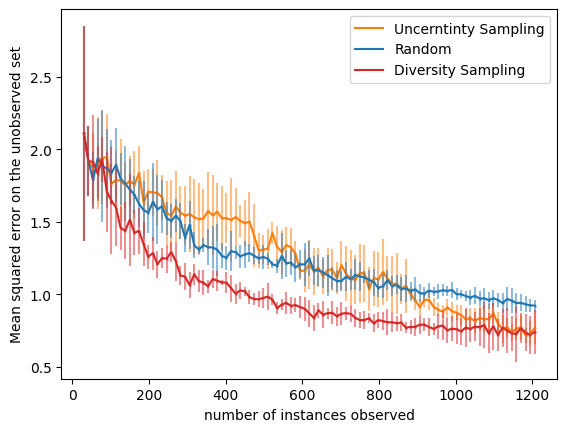

In [87]:
batchsize = 12
list_number=range(30,1200+batchsize,batchsize)
print(list_number)
plt.plot(list_number,unc_test_error_mean,color='tab:orange',label='Uncerntinty Sampling')
plt.legend(loc ="upper right")
plt.errorbar(list_number,unc_test_error_mean,yerr = unc_test_error_std,fmt ='o',color='tab:orange',markersize=1,alpha=0.5)

plt.plot(list_number,random_test_error_mean,color='tab:blue',label='Random')
plt.legend(loc ="upper right")
plt.errorbar(list_number,random_test_error_mean,yerr = random_test_error_std,fmt ='o',color='tab:blue',markersize=1,alpha=0.5)

print(len(div_test_error_mean))
plt.plot(list_number,div_test_error_mean,color='tab:red',label='Diversity Sampling')

plt.errorbar(list_number,div_test_error_mean,yerr = div_test_error_std,fmt ='o',color='tab:red',markersize=1,alpha=0.5)
plt.legend(loc ="upper right")

plt.xlabel('number of instances observed')
plt.ylabel('Mean squared error on the unobserved set')
plt.show()




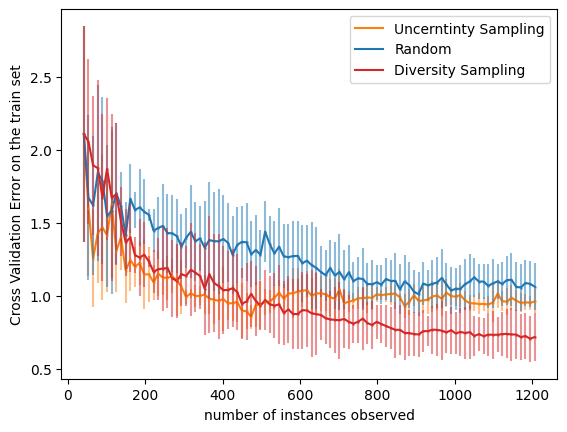

In [88]:
list_number_val=range(42,1200+batchsize,batchsize)
plt.plot(list_number_val,unc_val_mean,color='tab:orange',label='Uncerntinty Sampling')
plt.legend(loc ="upper right")
plt.errorbar(list_number_val,unc_val_mean,yerr = unc_val_std,fmt ='o',color='tab:orange',markersize=1,alpha=0.5)

plt.plot(list_number_val,random_val_mean,color='tab:blue',label='Random')
plt.legend(loc ="upper right")
plt.errorbar(list_number_val,random_val_mean,yerr = random_val_std,fmt ='o',color='tab:blue',markersize=1,alpha=0.5)

plt.plot(list_number_val,div_val_mean,color='tab:red',label='Diversity Sampling')
plt.legend(loc ="upper right")
plt.errorbar(list_number_val,div_val_mean,yerr = random_val_std,fmt ='o',color='tab:red',markersize=1,alpha=0.5)

plt.xlabel('number of instances observed')
plt.ylabel('Cross Validation Error on the train set')
plt.show()


In [ ]:
random_val_mean
